In [4]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns

# Делаем визуальную настройку графиков
sns.set_theme("notebook")
sns.set_palette("Set2")

# Загружаем данные
file_path = r'D:\coding\Практика\ds_salaries.csv'
data = pd.read_csv(file_path)

Выводим общую информацию о данных

In [5]:
# Выводим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Первичная визуализация данных

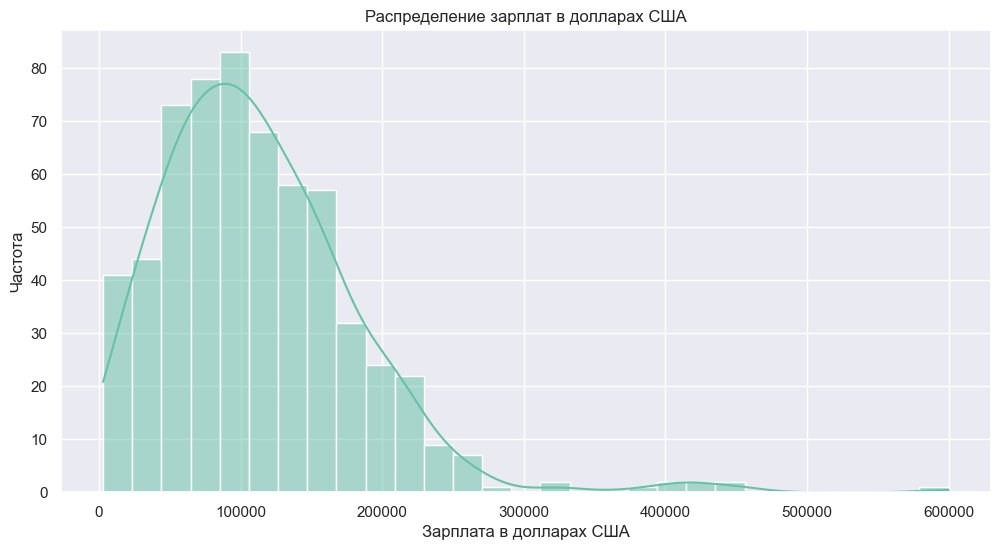

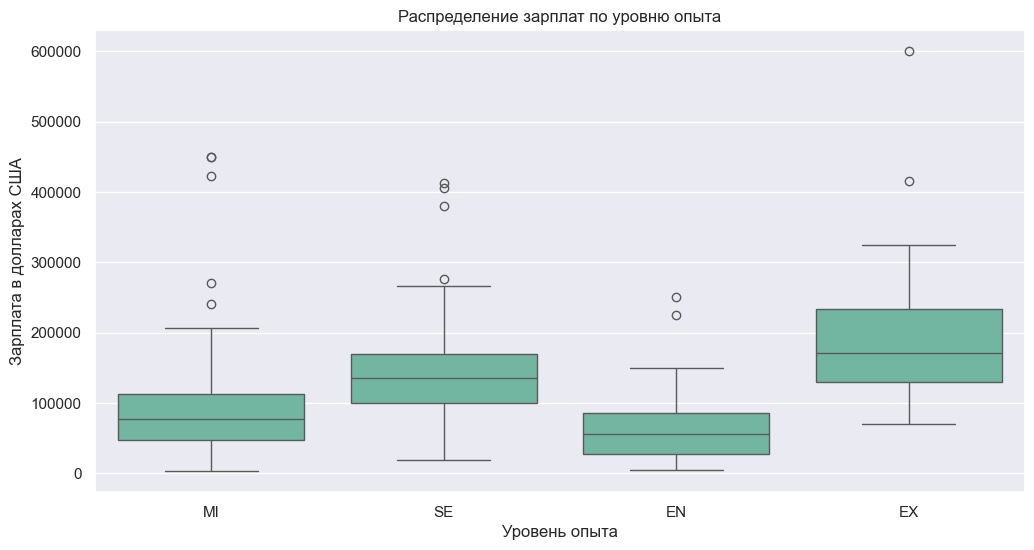

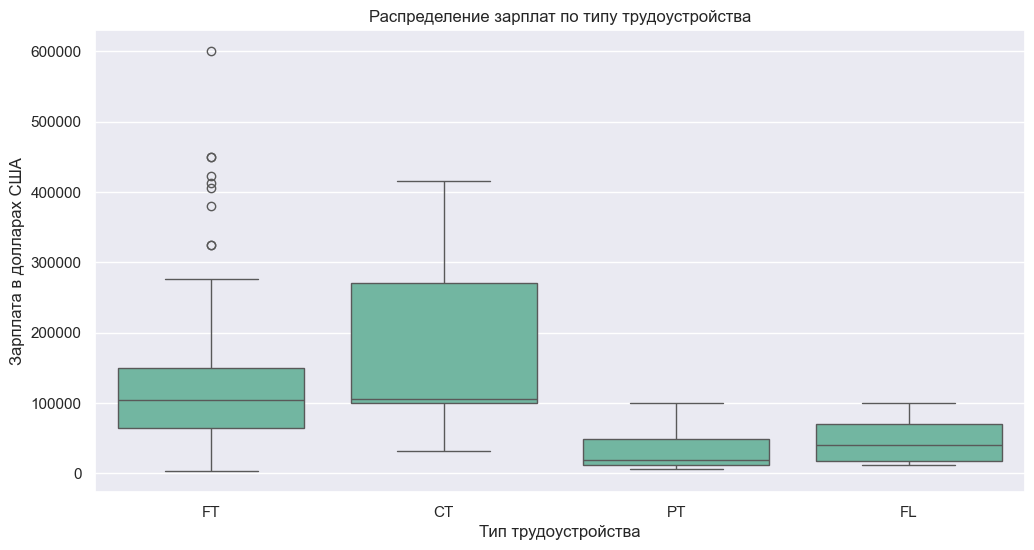

In [6]:
# Гистограмма зарплат в USD
plt.figure(figsize=(12, 6))
sns.histplot(data['salary_in_usd'], kde=True)
plt.title('Распределение зарплат в долларах США')
plt.xlabel('Зарплата в долларах США')
plt.ylabel('Частота')
plt.show()

# Boxplot зарплат по опыту работы
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Распределение зарплат по уровню опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата в долларах США')
plt.show()

# Boxplot зарплат по типу трудоустройства
plt.figure(figsize=(12, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=data)
plt.title('Распределение зарплат по типу трудоустройства')
plt.xlabel('Тип трудоустройства')
plt.ylabel('Зарплата в долларах США')
plt.show()

Ответы на вопросы HR-агентства

1:Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

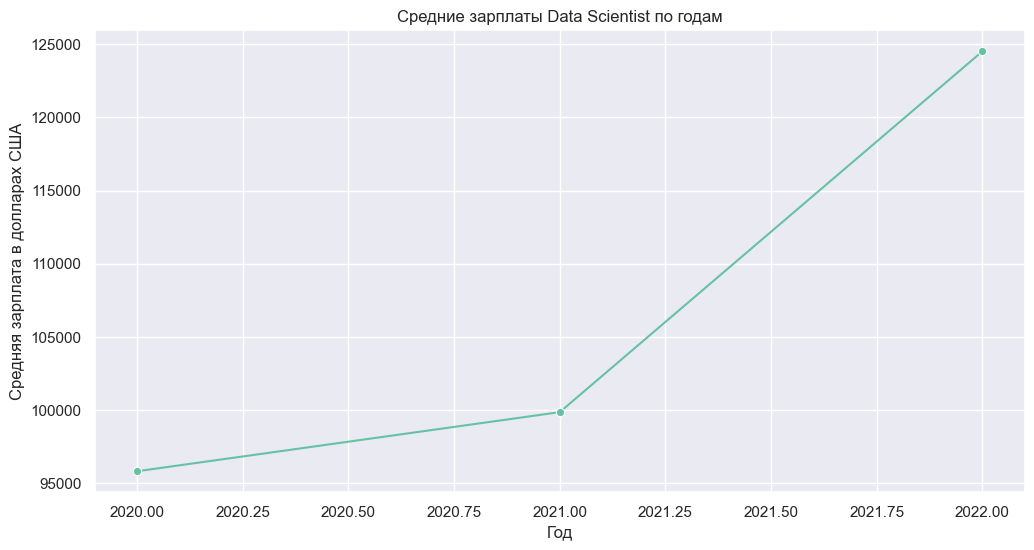

In [10]:
yearly_salaries = data.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Линейный график изменения зарплат по годам
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=yearly_salaries, marker='o')
plt.title('Средние зарплаты Data Scientist по годам')
plt.xlabel('Год')
plt.ylabel('Средняя зарплата в долларах США')
plt.show()



Проверка гипотезы о росте зарплат с помощью t-критерия для связанных выборок

In [15]:
salaries_2021 = data[data['work_year'] == 2021]['salary_in_usd']
salaries_2022 = data[data['work_year'] == 2022]['salary_in_usd']

_, p_value = stats.ttest_ind(salaries_2021, salaries_2022)
display(f'p-value: {p_value}')

'p-value: 4.372839063610908e-05'

2:Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

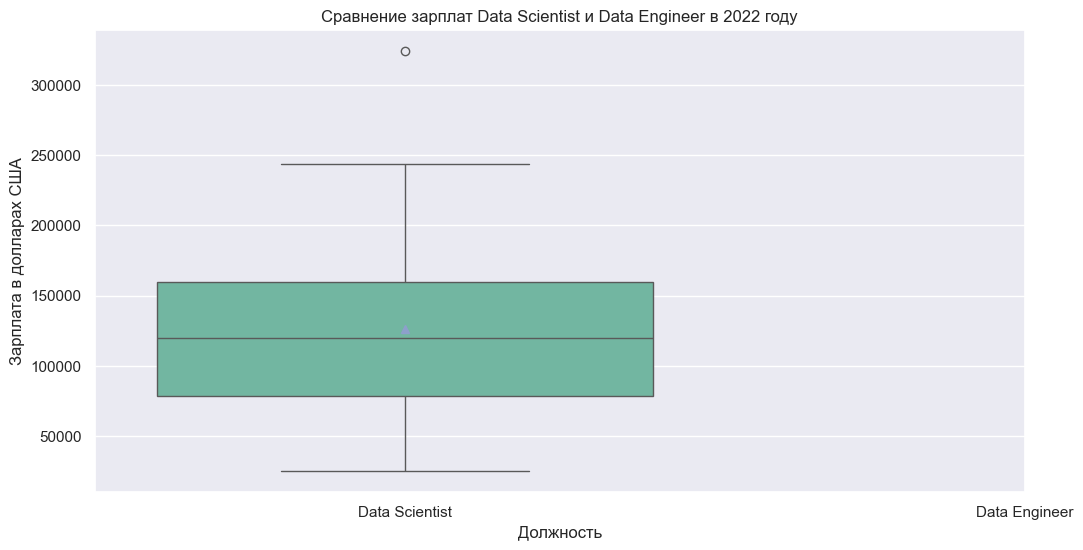

p-value: 0.2568072029017032


In [17]:
# Зарплаты Data Scientist и Data Engineer в 2022 году
ds_salaries = data[(data['work_year'] == 2022) & (data['job_title'] == 'Data Scientist')]['salary_in_usd']
de_salaries = data[(data['work_year'] == 2022) & (data['job_title'] == 'Data Engineer')]['salary_in_usd']

# Boxplot зарплат
plt.figure(figsize=(12, 6))
sns.boxplot(data=[ds_salaries, de_salaries], showmeans=True)
plt.xticks([0, 1], ['Data Scientist', 'Data Engineer'])
plt.title('Сравнение зарплат Data Scientist и Data Engineer в 2022 году')
plt.xlabel('Должность')
plt.ylabel('Зарплата в долларах США')
plt.show()

# Статистический тест
_, p_value = stats.ttest_ind(ds_salaries, de_salaries)
print(f'p-value: {p_value}')

3:Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

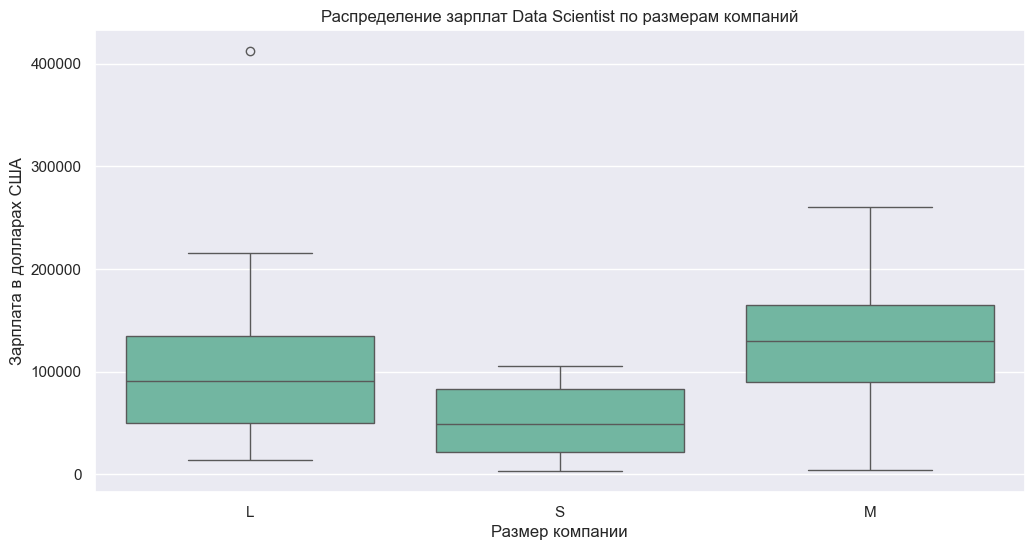

p-value: 5.271295955387133e-06


In [18]:
# Boxplot зарплат по размерам компаний
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=data[data['job_title'] == 'Data Scientist'])
plt.title('Распределение зарплат Data Scientist по размерам компаний')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата в долларах США')
plt.show()

# Статистический тест (ANOVA)
small = data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == 'S')]['salary_in_usd']
medium = data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == 'M')]['salary_in_usd']
large = data[(data['job_title'] == 'Data Scientist') & (data['company_size'] == 'L')]['salary_in_usd']

_, p_value = stats.f_oneway(small, medium, large)
print(f'p-value: {p_value}')

4:Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

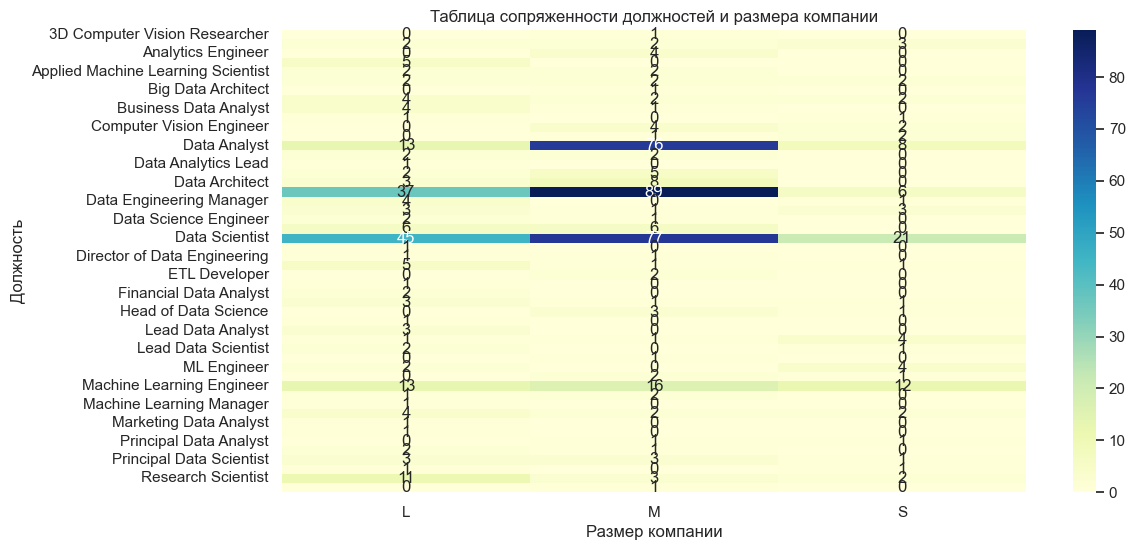

p-value: 4.233018587595214e-10


In [19]:
# Таблица сопряженности
crosstab = pd.crosstab(data['job_title'], data['company_size'])

# Тепловая карта
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Таблица сопряженности должностей и размера компании')
plt.xlabel('Размер компании')
plt.ylabel('Должность')
plt.show()

# Статистический тест хи-квадрат
_, p_value, _, _ = stats.chi2_contingency(crosstab)
print(f'p-value: {p_value}')

Анализ данных о зарплатах специалистов Data Scientist
Первичная визуализация данных
Распределение зарплат специалистов Data Scientist в долларах США:
Гистограмма распределения показывает, что большинство зарплат находится в диапазоне до 200,000 долларов. Есть несколько выбросов, которые превышают 400,000 долларов.

Распределение зарплат по уровню опыта:
Видно, что с увеличением уровня опыта зарплаты растут. Уровень EX (Executive-level/Director) имеет наибольший диапазон зарплат с несколькими выбросами.

Распределение зарплат по типу трудоустройства:
Контрактные сотрудники (CT) имеют более высокий уровень зарплат по сравнению с сотрудниками на полном рабочем дне (FT), неполном рабочем дне (PT) и фрилансерами (FL).

Средние зарплаты Data Scientist по годам:
График показывает тенденцию роста зарплат с 2020 по 2022 год.

Сравнение зарплат Data Scientist и Data Engineer в 2022 году:
Средние зарплаты Data Scientist и Data Engineer в 2022 году примерно одинаковы.

Распределение зарплат Data Scientist по размерам компаний:
Крупные компании (L) и средние компании (M) предлагают более высокие зарплаты по сравнению с малыми компаниями (S).

Таблица сопряженности должностей и размера компании:
Таблица показывает, что Data Scientists и Data Engineers более распространены в крупных и средних компаниях.

Проверка гипотез с помощью статистических тестов
Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

Проведен t-критерий для связанных выборок, p-value: 4.37e-05.
Вывод: Рост зарплат статистически значим.
Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

Проведен t-критерий для двух независимых выборок, p-value: 0.2568.
Вывод: Различие зарплат не является статистически значимым.
Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

Проведен однофакторный дисперсионный анализ (ANOVA), p-value: 5.27e-06.
Вывод: Различие зарплат в компаниях различных размеров статистически значимо.
Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Проведен критерий хи-квадрат для таблицы сопряженности, p-value: 4.23e-10.
Вывод: Есть статистически значимая связь между должностями и размером компании.
Заключение
Зарплаты специалистов Data Scientist растут ежегодно.
В 2022 году зарплаты Data Scientist и Data Engineer примерно одинаковы.
Зарплаты Data Scientist различаются в зависимости от размера компании, с наибольшими зарплатами в крупных и средних компаниях.
Есть значимая связь между наличием должностей Data Scientist и Data Engineer и размером компании.
Эти выводы подтверждаются проведенным статистическим анализом.






